# Exploratory Component

In the explorartory part we will attempt to answer a few questions about cities using the same previous cities dataset. We will be investigating the following:
- Predicting gasoline pump price
- Identify country based on transport infrastructure related variables
- Is the CO2 emmission of cities generally dependent on the cities themselves or are they dependent on the country where the city is located in.
- Based on various social/ economic parameters, is it possible to predict the location (coordinates) of the city.


To start we will look at modesharing in a city.

## Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from sklearn import decomposition
import seaborn
from  matplotlib import pyplot
from matplotlib.pyplot import figure
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df_new = pd.read_excel('Cities.xls', index_col=0, skipinitialspace=True) # Read with excel index. 
# Skip all white-spaces.

In [2]:
df_new.reset_index(drop=True, inplace=True)
df_new.head(3)

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
0,Baltimore(MD),285,7,Auto Sprawl,United States,85.0,6.1,0.3,2.6,0.66,8.5,24.9,0.013409,0.615385,6.417582,34,0.0,0.0,0.0,0.0,0.0,0.0,50,2.197802,NaN,0.00000,2.0,19.0,33.0,46.0,148.97,36.90,150.22,2275000,1857,1200,233673,332204,399059,195708,81.6,1.7,58789.0,7.2,77.33,48.58,76.48,78.28,150.69,0.443,22.9,78.8,31.19,81.0,0.78,45.0,72.0,14.300000,NaN,7468900.983,7.604833e+09,148.013337,28660.0,1018.199702,5.021972,2.869906,1.067736,0.007910,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
1,Melbourne,10,8,Auto Innovative,Australia,80.0,14.0,2,4.0,1.11,5.4,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,50,1.264223,600.0,15.17067,2.0,33.0,55.0,58.0,143.12,35.57,138.17,3955000,2543,1500,316060,462816,715525,350883,89.4,1.2,39358.0,5.5,79.04,44.30,72.93,76.07,139.62,NaN,NaN,82.0,60.23,86.9,0.74,50.0,77.0,10.200000,26.77,8636838.530,8.653670e+09,107.503591,48571.0,1001.948856,4.948413,2.876305,1.036985,0.001626,0.014489,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910
2,Niamey,186,1,Congested Emerging,Niger,NaN,9.0,2,60.0,1.02,26.4,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1435000,130,11100,248392,541978,960996,741379,18.7,3.5,427.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,61.8,NaN,2.4,0.04,NaN,NaN,0.106861,NaN,2134329.200,3.496995e+09,97.860119,13033.0,1638.451450,6.161297,3.187450,1.019423,0.000095,0.000000,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312


# Importing transport modal shares 

First we will perform some modelling and predicting relationships between transportation infrastructure related variables. Modeshares are mostly filled in European countries and USA. With 30 cities in the dataset Chinese cities creates 9% of all observations. The modeshares for Chinese cities will be imported as country's mean values and afterwards scaled, so they sum up to 100%. Same approach is applied on Indian cities. Other big countries like Russia,Mexico, Brazil etc. will have their modeshares imported from external data sources.

## Russia
First, lets have a look on Russian cities

In [3]:
df_new.loc[(df_new['Country'] == 'Russia')]

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
9,Yekaterinburg,209,2,BusTransit Sprawl,Russia,NaN,NaN,NaN,NaN,0.73,18.9,12.7,0.024517,0.659341,38.021978,26,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.0,34.0,56.0,68.0,138.89,35.00,107.01,1365000,518,2600,-46300,44710,81031,39391,74.0,1.3,11279.6,NaN,34.52,11.23,27.91,36.49,48.54,0.44,NaN,70.5,48.80,61.4,0.5,35.0,45.0,12.466816,NaN,1975651.316,2.480086e+09,230.800387,4896.0,1255.325909,4.994186,2.772610,1.057306,0.001035,0.000000,0.196135,0.114307,0.415356,0.296304,0.379869,0.039998,0.503676,0.651255,0.357707
41,Samara,211,2,BusTransit Sprawl,Russia,NaN,NaN,NaN,NaN,0.71,18.9,12.7,0.051626,0.873362,13.624454,30,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1145000,246,4700,-70052,-8804,38721,34297,74.0,1.3,11279.6,NaN,NaN,NaN,NaN,NaN,NaN,0.44,NaN,70.5,NaN,61.4,0.5,32.0,45.0,12.466816,NaN,2637257.766,1.200933e+09,210.828824,7246.0,455.371716,5.193476,2.803172,1.060739,0.000602,0.000042,0.204634,0.116580,0.395976,0.308220,0.269938,0.039978,0.531382,0.642363,0.328877
49,Nizhny Novgorod,210,2,BusTransit Sprawl,Russia,NaN,NaN,NaN,NaN,0.71,18.9,18.8,0.030225,1.176471,31.260504,32,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.0,32.0,51.0,59.0,NaN,NaN,NaN,1190000,622,1900,-89395,-77989,-6516,33859,74.0,1.3,11279.6,NaN,NaN,NaN,NaN,NaN,NaN,0.44,NaN,70.5,NaN,61.4,0.5,34.0,45.0,12.466816,NaN,1714075.845,3.019771e+09,195.269520,5120.0,1761.748774,5.185255,2.786584,1.060536,0.000854,0.000756,0.227153,0.117646,0.402780,0.316827,0.261707,0.033737,0.484500,0.646406,0.394053
230,St. Petersburg,207,2,BusTransit Sprawl,Russia,NaN,NaN,NaN,NaN,0.72,18.9,113.2,0.084039,1.303502,148.463035,62,0.0,0.0,0.0,0.0,0.0,0.0,96,1.867704,800.0,15.564202,4.0,41.0,65.0,90.0,221.35,51.30,218.21,5140000,1347,3800,-269342,122570,223632,77263,74.0,1.3,23361.0,NaN,38.31,17.54,30.40,40.35,52.68,0.44,NaN,71.0,57.20,61.4,0.5,44.0,45.0,12.466816,63.24,4177220.494,3.693239e+09,188.783861,13125.0,884.137936,4.378519,3.030951,1.047678,0.000375,0.032560,0.505573,0.123685,0.467379,0.383108,0.284965,0.078369,0.652189,0.738250,0.410689
270,Novosibirsk,208,2,BusTransit Sprawl,Russia,NaN,NaN,NaN,NaN,0.70,18.9,15.9,0.025563,0.872483,58.859060,31,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0

All Russian cities are in same typology category with predominant public transpor
Based on statistics of Saint Petersburg modeshares https://cyberleninka.ru/article/n/analiz-transportnoy-sistemy-sankt-peterburga-i-vozmozhnosti-povysheniya-v-ney-roli-prigorodnyh-zheleznyh-dorog/viewer
And Moscow Modeshares
https://megaobuchalka.ru/12/6677.html
Modeshares for other Russian cities will be imputed as average of available observations.

In [4]:
#First lets impute Saint Petersburg modeshares to other Russian cities
indices = [9,41,49,230,270,316]
df_new.at[292,['Bicycle Modeshare (%)']]=np.array([0])
df_new.at[indices,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([34, 64, 1,1])

As a former Soviet Union part, Ukraine Cities has same typology as Russian cities. It is reasonable to impute Odessa and Kharkiv modeshares with Russian cities values. For capital city, Kiev modehsares data are imported from: https://www.slideshare.net/EMBARQNetwork/revision-of-kievs-ground-transport-network-through-data-collection-transforming-transportation-2016

In [5]:
df_new.loc[(df_new['Country'] == 'Ukraine')]

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
21,Kharkiv,256,6,Hybrid Giant,Ukraine,NaN,NaN,NaN,NaN,1.11,13.5,38.1,0.096701,1.880878,144.890282,42,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1595000,394,4100,-101844,-31306,-21628,-10693,69.7,2.4,2905.9,NaN,26.10,10.55,19.01,18.64,25.37,NaN,NaN,71.3,46.64,41.8,0.43,30.0,27.0,5.959633,NaN,2666121.653,4.222249e+09,181.826478,8574.0,1583.667186,5.422668,2.870675,1.050968,0.000575,0.0,0.414479,0.083761,0.446059,0.192846,0.392182,0.049043,0.587961,0.435881,0.424409
283,Odessa,257,1,Congested Emerging,Ukraine,NaN,NaN,NaN,NaN,1.12,13.5,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1010000,207,4900,-55370,-27388,24269,19372,69.7,2.4,2905.9,NaN,28.74,7.54,20.56,28.56,40.34,NaN,NaN,71.3,NaN,41.8,0.43,29.0,27.0,5.959633,NaN,1912328.192,2.187179e+09,185.105817,6102.0,1143.725826,5.488930,2.921591,1.047784,0.000514,0.0,0.087037,0.083599,0.402703,0.150705,0.299488,0.062995,0.656293,0.298127,0.367078
305,Kiev,255,6,Hybrid Giant,Ukraine,NaN,NaN,NaN,NaN,1.14,13.5,67.6,0.173779,1.857143,179.964286,57,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,140.88,36.42,108.69,2800000,389,7200,32491,198559,138521,26016,69.7,2.4,8668.0,NaN,28.36,12.86,21.17,23.32,31.32,NaN,NaN,71.3,51.65,41.8,0.43,33.0,27.0,5.959633,73.02,2987137.265,3.692770e+09,195.711018,9047.0,1236.223794,4.855137,2.796244,1.056966,0.000826,0.0,0.539169,0.081474,0.444868,0.210245,0.405558,0.083228,0.594495,0.418426,0.377972


In [6]:
df_new.at[283,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([34, 64, 1,1])
df_new.at[21,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([34, 64, 1,1])
df_new.at[305,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([28, 37, 0,35])

## China

According to arcticle https://www.intechopen.com/online-first/the-rise-and-decline-of-car-use-in-beijing-and-shanghai car traffic growth in two major Chinese cities , Beijing and Shangai, has already reached its peak values. Because majority of available modalshares are in similar ranges ( for cars around 20%), it seems reasonable to impute modalshares on the basis of mean value of Chinese cities with subjective rounding so the final sum is 100% 

In [7]:
df_china=df_new.loc[(df_new['Country'] == 'China')]
df_china

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
4,Urumqi,67,12,MetroBike Emerging,China,21.70,54.70,NaN,NaN,1.16,18.8,0.00,0.000000,0.000000,0.000000,0,66.0,0.134146,2.537764,9.123867,34.441088,7.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3310000,492,6700,556511,1249115,1610288,491541,55.6,9.8,12189.0,3.40,NaN,NaN,NaN,NaN,NaN,0.32,NaN,76.100,NaN,50.1,0.43,NaN,58.0,7.550916,NaN,8.891136e+06,2.169530e+08,546.944874,9567.0,24.401041,4.736409,2.680313,1.064157,0.000348,0.060128,0.103334,0.447261,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617
16,Hefei,68,12,MetroBike Emerging,China,42.00,24.60,2.7,NaN,1.16,18.8,24.60,0.033931,0.616622,0.000000,1,7.0,0.009655,0.241287,1.742627,5.247989,8.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3730000,725,5100,432769,1297253,1719219,495298,55.6,9.8,11809.0,3.30,NaN,NaN,NaN,NaN,NaN,0.32,NaN,76.100,NaN,50.1,0.43,32.0,58.0,7.550916,NaN,4.311202e+06,4.000567e+09,297.283299,8118.0,927.946895,4.416572,3.322073,1.027265,0.000724,0.014996,0.111030,0.131602,0.406251,0.263258,0.628634,0.286017,0.527857,0.610987,0.378841
19,Dalian,63,12,MetroBike Emerging,China,NaN,43.00,NaN,NaN,1.16,18.8,141.00,0.181467,1.302326,24.139535,14,14.0,0.018018,0.255814,1.488372,6.069767,10.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4300000,777,5500,948960,472165,762034,415737,55.6,9.8,17879.0,2.61,NaN,NaN,NaN,NaN,NaN,0.32,NaN,76.100,NaN,50.1,0.43,38.0,58.0,10.300000,NaN,1.865683e+06,1.889744e+09,245.355463,4473.0,1012.896902,5.279873,3.028980,1.086058,0.001955,0.011084,0.359520,0.160685,0.389632,0.272460,0.688892,0.249868,0.570295,0.603667,0.317975
32,Chongqing,47,11,MetroBike Giant,China,20.60,32.60,NaN,46.30,1.18,18.8,201.60,0.207621,1.612903,84.677419,12,11.5,0.011843,0.120968,0.134409,0.483871,10.0,0,0.000000,0.0,0.000000,0.0,52.0,90.0,94.0,NaN,NaN,NaN,7440000,971,7700,4313087,2296495,2746449,1148410,55.6,9.8,10516.0,3.40,NaN,NaN,NaN,NaN,NaN,0.32,NaN,76.100,NaN,50.1,0.43,38.0,58.0,3.000000,NaN,3.489966e+06,3.163885e+09,350.820906,5859.0,906.565902,4.119621,2.914077,1.117246,0.001487,0.050712,0.467995,0.142013,0.356495,0.328799,0.621881,0.540753,0.809691,0.591741,0.229535
54,Chengdu,51,12,MetroBike Emerging,China,11.00,15.00,NaN,NaN,1.16,18.8,108.20,0.064252,0.814607,3

In [8]:
car =df_new.loc[df_new['Country'] == 'China', 'Car Modeshare (%)'].mean()

publictransit =df_new.loc[df_new['Country'] == 'China', 'Public Transit Modeshare (%)'].mean()

bike=df_new.loc[df_new['Country'] == 'China', 'Bicycle Modeshare (%)'].mean()

walking = df_new.loc[df_new['Country'] == 'China', 'Walking Modeshare (%)'].mean()

print(car,publictransit,bike,walking)

21.22533333333333 34.20125 19.823571428571427 27.345384615384617


In [9]:
#Identifying indexes of missing values
pd.DataFrame(df_china[df_china['Car Modeshare (%)'].isna() &df_china['Bicycle Modeshare (%)'].isna() & df_china['Walking Modeshare (%)'].isna() & df_china['Public Transit Modeshare (%)'].isna() ])


,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
77,Wuhan,48,12,MetroBike Emerging,China,NaN,NaN,NaN,NaN,1.16,18.8,128.70,0.097426,1.338583,74.540682,13,0.0,0.000000,0.000000,0.000000,0.000000,0.0,718,9.422572,90000.0,1181.102362,9.0,35.0,54.0,67.0,NaN,NaN,NaN,7620000,1321,5800,3220264,2266272,2737255,1086068,55.6,9.8,17015.0,3.52,NaN,NaN,NaN,NaN,NaN,0.37,NaN,76.1,NaN,50.1,0.43,37.0,58.0,7.550916,89.81,4501492.285,4.123643e+09,256.115856,10326.0,916.061353,4.583052,2.979153,1.061557,0.001694,0.025208,0.347734,0.083437,0.863012,0.281825,0.694197,0.482784,0.548483,0.621334,0.374049
83,Jinan,60,12,MetroBike Emerging,China,NaN,NaN,NaN,NaN,1.16,18.8,0.00,0.000000,0.000000,0.000000,0,84.0,0.106329,2.596401,5.012853,16.966581,10.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3890000,790,4900,668640,989566,1239395,496999,55.6,9.8,13859.0,2.40,NaN,NaN,NaN,NaN,NaN,0.32,NaN,76.1,NaN,50.1,0.43,33.0,58.0,7.550916,NaN,1970190.100,1.935564e+09,359.852073,3181.0,982.425046,4.721523,3.086482,1.057626,0.002253,0.050299,0.084296,0.402845,0.391018,0.286817,0.760969,0.304203,0.563926,0.712352,0.219084
124,Harbin,53,12,MetroBike Emerging,China,NaN,NaN,NaN,NaN,1.16,18.8,17.50,0.030702,0.366226,11.139369,4,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4915000,570,8600,1495233,1608738,1974741,739035,55.6,9.8,12865.0,3.60,NaN,NaN,NaN,NaN,NaN,0.32,NaN,76.1,NaN,50.1,0.43,35.0,58.0,5.600000,NaN,2343580.915,2.645849e+09,320.818743,4244.0,1128.977099,5.071864,3.194686,1.054613,0.000515,0.041749,0.139282,0.061494,0.383312,0.263262,0.744615,0.367624,0.569243,0.635807,0.306163
129,Shenyang,54,12,MetroBike Emerging,China,NaN,NaN,NaN,NaN,1.16,18.8,55.10,0.054554,0.693548,44.838710,7,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.0,0.000000,0.0,39.0,60.0,73.0,NaN,NaN,NaN,6200000,1010,6100,911803,906290,1303408,658315,55.6,9.8,14105.0,3.03,NaN,NaN,NaN,NaN,NaN,0.32,NaN,76.1,NaN,50.1,0.43,35.0,58.0,10.500000,NaN,2952695.658,3.120790e+09,357.729060,4785.0,1056.929208,5.172828,3.221212,1.037639,0.000075,0.040963,0.222189,0.056917,0.385558,0.276916,0.750081,0.309411,0.580191,0.696692,0.345283
147,Xiamen,71,12,MetroBike Emerging,China,NaN,NaN,NaN,NaN,1.16,18.8,0.00,0.000000,0.000000,0.000000,0,49.

In [10]:
#imputing rows with nan values

indices = [77,83,124,129,147,151,154,182,193,272,321]
df_new.at[indices,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([21, 34, 22,23])
#imputing values
df_new.at[4,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([21.7, 54.7, 18,6.6])
df_new.at[32,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([20.6, 32.6, 0.5,46.3])
df_new.at[54,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([11, 15, 44,20])
df_new.at[16,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([42, 24.6, 2.7,19.3])
df_new.at[19,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([21, 43, 20,16])
df_new.at[78,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([23.8, 43, 20,3.2])
df_new.at[187,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([17, 23, 37,26])
df_new.at[272,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([17, 24, 39,20])
df_new.at[304,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([40, 60, 0,0])

In [11]:
df_new.loc[(df_new['Country'] == 'China')]

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
4,Urumqi,67,12,MetroBike Emerging,China,21.70,54.70,18,6.60,1.16,18.8,0.00,0.000000,0.000000,0.000000,0,66.0,0.134146,2.537764,9.123867,34.441088,7.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3310000,492,6700,556511,1249115,1610288,491541,55.6,9.8,12189.0,3.40,NaN,NaN,NaN,NaN,NaN,0.32,NaN,76.100,NaN,50.1,0.43,NaN,58.0,7.550916,NaN,8.891136e+06,2.169530e+08,546.944874,9567.0,24.401041,4.736409,2.680313,1.064157,0.000348,0.060128,0.103334,0.447261,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617
16,Hefei,68,12,MetroBike Emerging,China,42.00,24.60,2.7,19.30,1.16,18.8,24.60,0.033931,0.616622,0.000000,1,7.0,0.009655,0.241287,1.742627,5.247989,8.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3730000,725,5100,432769,1297253,1719219,495298,55.6,9.8,11809.0,3.30,NaN,NaN,NaN,NaN,NaN,0.32,NaN,76.100,NaN,50.1,0.43,32.0,58.0,7.550916,NaN,4.311202e+06,4.000567e+09,297.283299,8118.0,927.946895,4.416572,3.322073,1.027265,0.000724,0.014996,0.111030,0.131602,0.406251,0.263258,0.628634,0.286017,0.527857,0.610987,0.378841
19,Dalian,63,12,MetroBike Emerging,China,21.00,43.00,20,16.00,1.16,18.8,141.00,0.181467,1.302326,24.139535,14,14.0,0.018018,0.255814,1.488372,6.069767,10.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4300000,777,5500,948960,472165,762034,415737,55.6,9.8,17879.0,2.61,NaN,NaN,NaN,NaN,NaN,0.32,NaN,76.100,NaN,50.1,0.43,38.0,58.0,10.300000,NaN,1.865683e+06,1.889744e+09,245.355463,4473.0,1012.896902,5.279873,3.028980,1.086058,0.001955,0.011084,0.359520,0.160685,0.389632,0.272460,0.688892,0.249868,0.570295,0.603667,0.317975
32,Chongqing,47,11,MetroBike Giant,China,20.60,32.60,0.5,46.30,1.18,18.8,201.60,0.207621,1.612903,84.677419,12,11.5,0.011843,0.120968,0.134409,0.483871,10.0,0,0.000000,0.0,0.000000,0.0,52.0,90.0,94.0,NaN,NaN,NaN,7440000,971,7700,4313087,2296495,2746449,1148410,55.6,9.8,10516.0,3.40,NaN,NaN,NaN,NaN,NaN,0.32,NaN,76.100,NaN,50.1,0.43,38.0,58.0,3.000000,NaN,3.489966e+06,3.163885e+09,350.820906,5859.0,906.565902,4.119621,2.914077,1.117246,0.001487,0.050712,0.467995,0.142013,0.356495,0.328799,0.621881,0.540753,0.809691,0.591741,0.229535
54,Chengdu,51,12,MetroBike Emerging,China,11.00,15.00,44,20.00,1.16,18.8,108.20,0.064252,0.81

## Imputing modal shares for Indian cities
WE can use same methodology to impute modeshares for Indian cities, first lets find mean modal shares

In [12]:
car =df_new.loc[df_new['Country'] == 'India', 'Car Modeshare (%)'].mean()
bike=df_new.loc[df_new['Country'] == 'India', 'Bicycle Modeshare (%)'].mean()
publictransit =df_new.loc[df_new['Country'] == 'India', 'Public Transit Modeshare (%)'].mean()
walking = df_new.loc[df_new['Country'] == 'India', 'Walking Modeshare (%)'].mean()
modes_india_mean = [car, publictransit, bike, walking] 
print(*modes_india_mean) 

31.875 27.25 9.875 27.375


In [13]:
df_india=df_new.loc[(df_new['Country'] == 'India')]
df_india.head()

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
10,Pune,120,3,Congested Boomer,India,54.0,12.0,11,22.0,1.19,5.2,0.0,0.000000,0.000000,0.000000,0,29.0,0.060543,NaN,NaN,3.474503,3.0,0,0.0000,0.0,0.000000,0.0,NaN,NaN,NaN,236.99,51.11,250.42,5785000,479,12100,1224936,1296609,1630382,905552,32.7,4.3,1861.5,NaN,26.42,7.55,26.91,19.50,110.53,NaN,13.7,68.3,53.70,28.3,0.32,36.0,17.0,1.590273,78.10,5.700998e+06,4.744294e+09,120.175349,27097.0,832.186593,4.852631,2.595167,1.076220,0.001635,0.000087,0.041021,0.154039,0.458655,0.174894,0.230949,0.333745,0.483623,0.196003,0.309751
15,Delhi,113,3,Congested Boomer,India,19.0,42.0,12,21.0,1.14,9.1,213.0,0.098474,0.621721,36.875850,15,0.0,0.000000,0.0,0.0,0.000000,0.0,7,0.0272,NaN,NaN,11.0,NaN,NaN,NaN,255.36,52.28,279.66,25735000,2163,11900,6006419,6202838,7338635,3661236,32.7,4.3,12747.0,3.14,28.43,9.73,26.24,22.02,81.69,0.36,13.7,64.0,39.65,28.3,0.32,40.0,17.0,1.590273,92.48,2.145638e+07,8.119261e+09,93.310510,134785.0,378.407780,5.298626,2.758881,1.049602,0.000761,0.001216,0.368698,0.073568,0.513839,0.180778,0.243233,1.000000,0.622991,0.416115,0.567405
35,Bangalore,117,3,Congested Boomer,India,25.0,35.0,7,26.0,1.19,8.9,31.5,0.027015,0.295130,3.935071,6,0.0,0.000000,0.0,0.0,0.000000,0.0,NaN,0.0000,150.0,1.475652,5.0,NaN,NaN,NaN,227.41,49.20,235.90,10165000,1166,8700,1531099,2707743,3366398,1551803,32.7,4.3,5051.0,NaN,26.65,8.72,27.21,16.66,98.88,0.37,13.7,68.3,52.02,28.3,0.32,41.0,17.0,1.590273,83.16,1.095320e+07,8.872230e+09,89.926978,70842.0,810.012909,5.343632,2.759794,1.043144,0.000390,0.007013,0.147560,0.047635,0.477260,0.164765,0.252967,0.478411,0.554087,0.278507,0.496363
80,Mumbai,114,3,Congested Boomer,India,15.0,45.0,6,27.0,1.27,3.2,11.4,0.012940,0.052436,4.369674,3,0.0,0.000000,0.0,0.0,0.000000,0.0,NaN,0.0000,NaN,0.000000,6.0,NaN,NaN,NaN,301.49,62.05,288.09,22885000,881,26000,3930364,3055196,4239060,2895829,32.7,4.3,7005.0,11.70,29.35,21.35,29.33,22.20,69.47,0.37,13.7,55.5,51.17,28.3,0.32,43.0,17.0,1.590273,88.27,1.738099e+06,1.449919e+09,124.247525,8221.0,834.198382,5.073402,2.884639,1.069184,0.002073,0.019298,0.150546,0.047922,0.448513,0.176602,0.215412,0.734119,0.660284,0.109147,0.312022
127,Lucknow,122,1,Congested Emerging,India,NaN,NaN,NaN,NaN,1.19,16.6,0.0,0.000000,0.0

In [14]:
df_new.at[10,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([32, 28, 10,30])
df_new.at[15,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([32, 28, 10,30])
df_new.at[35,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([32, 28, 10,30])
df_new.at[127,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([32, 28, 10,30])


## Mexico

In [15]:
df_new.loc[(df_new['Country'] == 'Mexico')]

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
47,Acapulco,173,4,BusTransit Dense,Mexico,NaN,67.2,NaN,NaN,0.86,17.7,0.0,0.000000,0.000000,0.000000,0,16.0,0.134454,2.119205,10.066225,39.735099,2.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,755000,119,6300,193395,73664,191117,94664,79.2,2.6,7638.0,2.3,NaN,NaN,NaN,NaN,NaN,0.46,40.0,76.7,NaN,49.2,0.5,NaN,35.0,1.7,NaN,1.789773e+06,1.475855e+09,115.461801,8915.0,824.604638,5.118278,2.696505,1.100644,0.002520,0.000000,0.115996,0.454693,0.379365,0.286875,0.235401,0.077305,0.687371,0.502714,0.273384
58,Chihuahua,174,2,BusTransit Sprawl,Mexico,63.4,14.4,NaN,NaN,0.86,21.0,0.0,0.000000,0.000000,0.000000,0,22.0,0.084942,4.260355,9.859000,17.751479,5.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,845000,259,3300,143212,171600,205884,95300,79.2,2.6,14506.0,5.9,NaN,NaN,NaN,NaN,NaN,0.46,40.0,76.7,NaN,49.2,0.5,NaN,35.0,4.7,NaN,9.487584e+07,2.368865e+08,280.295562,198248.0,2.496806,5.583348,2.955224,1.097455,0.001507,0.014334,0.034116,0.420467,0.401891,0.313310,0.294820,0.081795,0.513197,0.947189,0.258262
87,Mexico City,165,4,BusTransit Dense,Mexico,20.7,71.3,1,NaN,0.93,11.7,226.5,0.109315,0.963915,80.276817,48,56.0,0.027027,0.874938,1.097000,5.950000,13.0,452,2.234305,6500.0,32.130499,8.0,66.0,96.0,101.0,260.10,51.88,294.61,20230000,2072,9800,2709619,2120752,3096579,1342029,79.2,2.6,20960.0,6.4,36.39,16.86,33.15,33.00,58.33,0.49,40.0,81.2,34.97,49.2,0.5,43.0,35.0,3.4,88.03,1.783873e+07,1.492591e+10,97.881076,105476.0,836.714076,5.220072,3.062943,1.037431,0.001870,0.013435,0.543808,0.341433,0.542502,0.318558,0.131564,0.459570,1.000000,0.538646,0.765839
107,Tijuana,169,2,BusTransit Sprawl,Mexico,NaN,NaN,NaN,NaN,0.89,15.3,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1410000,466,3000,526730,469559,541742,190565,79.2,2.6,14835.0,5.3,32.40,7.82,30.06,29.94,56.11,0.46,40.0,76.7,50.70,49.2,0.5,NaN,35.0,1.4,NaN,7.182404e+06,6.714362e+09,117.290540,34461.0,934.834992,5.234672,2.805721,1.065532,0.002804,0.027301,0.064663,0.123724,0.428322,0.291391,0.284823,0.116840,0.561057,0.584909,0.407701
210,Leon,171,4,BusTransit Dense,Mexico,27.0,33.9,NaN,NaN,0.88,21.0,0.0,0.000000,0.000000,0.000000,0,32.0,0.0

In [16]:
car =df_new.loc[df_new['Country'] == 'Mexico', 'Car Modeshare (%)'].mean()
publictransit =df_new.loc[df_new['Country'] == 'Mexico', 'Public Transit Modeshare (%)'].mean()
bike=df_new.loc[df_new['Country'] == 'Mexico', 'Bicycle Modeshare (%)'].mean()
walking = df_new.loc[df_new['Country'] == 'Mexico', 'Walking Modeshare (%)'].mean()
modes_mexico_mean = [car, publictransit, bike, walking] 
print(*modes_mexico_mean) 

37.7875 44.00000000000001 1.0 30.0


In [17]:
df_new.at[47,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([30, 67.2, 1,2])
df_new.at[58,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([63.4, 14.6, 1,20])
df_new.at[107,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([38, 44, 1,17])
df_new.at[210,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([27, 34, 7,32])
df_new.at[239,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([45, 40.6, 4.4,10])
df_new.at[257,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([27, 28, 15,30])
df_new.at[269,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([59.0, 36.1, 1.9,3])
df_new.at[323,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([41.2, 54.5, 1,2.8])


## Middle East
In Saudi Arabia, Bicycle and Walking is basically no option because of heat, lets increase pt share to 8% and impute 92% for car and 8% for public transport.
Sharjah mode shares based on these statistics from Dubai: https://www.statista.com/statistics/725806/dubai-share-of-motorized-trips-by-transport-mode/


In [43]:
df_new.loc[(df_new['Country'] == 'Saudi Arabia')]

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
122,Riyadh,214,2,BusTransit Sprawl,Saudi Arabia,92.0,2.0,NaN,NaN,0.54,27.4,0.0,0.00000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,27.0,28.0,41.0,181.98,40.88,189.43,5845000,1658,3500,1242201,1659632,2067065,796186,83.1,1.9,21395.4,NaN,47.54,16.16,38.93,33.23,173.64,NaN,NaN,74.5,79.29,65.9,0.44,34.0,NaN,17.927485,69.68,1.370977e+07,1.189709e+10,112.179278,77698.0,867.781767,5.261973,3.054771,1.029091,0.003680,0.0,0.012965,0.113289,0.423578,0.425893,0.276519,0.261388,0.219632,0.825540,0.628525
174,Medina,216,2,BusTransit Sprawl,Saudi Arabia,NaN,NaN,NaN,NaN,0.54,27.4,0.0,0.00000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1260000,350,3600,265660,311462,384509,186731,83.1,1.9,21395.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.5,NaN,65.9,0.44,NaN,NaN,17.927485,NaN,4.315614e+06,3.740258e+09,119.205965,22865.0,866.680467,5.098925,2.994210,1.043384,0.000535,0.0,0.067631,0.123272,0.387369,0.310008,0.259030,0.076025,0.526677,0.770097,0.429735
180,Mecca,215,2,BusTransit Sprawl,Saudi Arabia,NaN,NaN,NaN,NaN,0.54,27.4,18.1,0.04653,0.534125,2.373887,7,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1685000,389,4300,311323,375347,512478,250010,83.1,1.9,21395.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.5,NaN,65.9,0.44,NaN,NaN,17.927485,NaN,4.550199e+06,3.856454e+09,147.652230,19214.0,847.535387,4.984081,2.895375,1.062217,0.000961,0.0,0.135091,0.126276,0.391435,0.310916,0.260405,0.088074,0.527453,0.770685,0.402959
181,Jeddah,217,2,BusTransit Sprawl,Saudi Arabia,NaN,NaN,NaN,NaN,0.54,27.4,0.0,0.00000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,27.0,29.0,46.0,203.79,44.20,266.90,3775000,842,4500,766175,943938,1237841,531384,83.1,1.9,21395.4,NaN,48.94,14.84,38.85,32.56,117.52,NaN,NaN,74.5,69.13,65.9,0.44,35.0,NaN,17.927485,78.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071821,0.112666,0.379506,0.362604,0.280254,0.180197,0.357534,0.824245,0.408953


In [21]:
df_new.at[122,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([92, 8, 0,0])
df_new.at[174,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([92, 8, 0,0])
df_new.at[180,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([92, 8, 0,0])
df_new.at[181,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([92, 8, 0,0])
df_new.at[190,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([85.6, 14.4, 0,0])

## Brazil

In [22]:
df_new.loc[(df_new['Country'] == 'Brazil')]

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
79,Belo Horizonte,23,4,BusTransit Dense,Brazil,32.6000,28.1000,0.4,34.80,1.33,22.5,28.1,0.025827,0.416667,14.122807,31,39.30,0.036121,1.820175,67.236842,68.906184,43.0,40,0.877193,400.0,8.771930,4.0,27.0,42.0,59.0,226.83,50.36,239.31,4560000,1088,4200,1111260,747494,810432,339642,85.7,2.1,20134.0,NaN,47.76,13.39,38.16,35.03,44.19,0.57,NaN,75.00,31.09,54.2,0.5,37.0,41.0,2.46587,54.57,7.053056e+06,1.041604e+10,110.618817,37597.0,1476.811956,5.473720,3.096627,1.047105,0.002075,0.008805,0.246728,0.799931,0.434596,0.333046,0.190529,0.152714,0.496504,0.453486,0.604577
121,Sao Paulo,21,4,BusTransit Dense,Brazil,27.6000,39.0000,0.6,NaN,1.22,11.8,77.4,0.028593,0.325164,63.867993,43,45.00,0.016624,1.053142,19.247755,46.503276,38.0,241,1.169619,600.0,2.911915,6.0,30.0,42.0,53.0,204.02,46.41,217.63,20605000,2707,7600,2323364,2550162,2593696,931681,85.7,2.1,25650.0,16.1,54.65,21.48,41.66,48.34,43.55,0.55,28.09,73.15,27.25,54.2,0.5,44.0,41.0,2.46587,88.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363477,0.584078,0.443258,0.377552,0.192044,0.408150,0.551303,0.337763,0.650819
146,Brasilia,25,4,BusTransit Dense,Brazil,32.3675,37.2125,2.79,25.92,1.31,20.9,42.4,0.063001,0.928433,21.179884,16,91.10,0.135364,3.713733,5.377176,8.239845,7.0,0,0.000000,0.0,0.000000,0.0,20.0,35.0,50.0,138.73,30.31,160.93,2585000,673,3800,882855,955036,953032,279081,85.7,2.1,35689.0,6.0,53.31,16.64,40.52,45.91,54.77,0.67,NaN,75.00,34.60,54.2,0.5,35.0,41.0,2.46587,34.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208910,0.546957,0.387535,0.389675,0.335770,0.147570,0.371569,0.456456,0.494426
191,Salvador,24,1,Congested Emerging,Brazil,85.6000,14.4000,0,0.00,1.34,16.7,11.9,0.034000,0.247678,0.000000,3,8.20,0.023429,0.743034,NaN,30.959752,NaN,23,0.712074,NaN,NaN,5.0,40.0,63.0,70.0,NaN,NaN,NaN,3230000,350,9200,637345,978512,978696,291554,85.7,2.1,10070.0,NaN,NaN,NaN,NaN,NaN,NaN,0.57,NaN,75.00,NaN,54.2,0.5,34.0,41.0,2.46587,NaN,3.774008e+06,2.786893e+09,111.252199,19967.0,738.443652,4.860878,2.663989,1.090147,0.004196,0.009519,0.132109,0.252560,0.430285,0.269299,0.283995,0.154274,0.649688,0.282627,0.300999
281,Rio de Janeiro,22,4,BusTransit Dense,Brazil,17.6900,45.3600,2.42,29.36,1.43,16.7,58.0,0.028713,0.347017,19.314431

In [44]:
#These values are rough estimate
df_new.at[121,['Walking Modeshare (%)']] = 22.8
df_new.at[191,['Bicycle Modeshare (%)']] = 0.6
df_new.at[284,['Bicycle Modeshare (%)']] = 2.78

## Turkey
Modeshares obtained from https://core.ac.uk/download/pdf/158369769.pdf, page 59 for Ankara,Istanbul and Izmir, rest will be imputed as mean values for these cities

In [45]:
df_new.loc[(df_new['Country'] == 'Turkey')]


,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
44,Bursa,252,6,Hybrid Giant,Turkey,NaN,NaN,NaN,NaN,1.47,8.5,38.9,0.187923,2.010582,48.306878,15,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.0,0.000000,0.0,30.0,34.0,53.0,146.50,39.06,110.01,1890000,207,9100,361424,479107,512549,216817,73.4,4.3,21507.0,NaN,41.90,7.17,35.68,28.93,70.41,NaN,NaN,75.80,79.08,46.3,0.48,34.0,59.0,4.243453,27.82,4269164.842,4.403153e+09,80.544201,32449.0,1031.385069,5.709082,3.028264,1.057703,0.000300,0.009200,0.322765,0.090151,0.417320,0.373144,0.496673,0.117759,0.386944,0.303567,0.422184
62,Istanbul,249,4,BusTransit Dense,Turkey,14.0,41.0,NaN,45.0,1.46,4.0,95.3,0.070074,0.539941,28.468935,28,52.0,0.038235,0.325444,3.069527,16.642012,11.0,10,0.073964,100.0,0.739645,6.0,49.0,63.0,91.0,266.75,56.53,272.30,13520000,1360,9900,2191708,2209082,2838050,1105795,73.4,4.3,24867.0,11.2,49.00,16.93,41.37,36.65,57.25,NaN,8.86,71.75,50.53,46.3,0.48,44.0,59.0,4.243453,65.96,9046675.210,9.446073e+09,74.600064,73930.0,1044.148625,5.290053,3.003823,1.055691,0.000856,0.016210,0.321497,0.313567,0.445529,0.373134,0.252082,0.415458,0.762601,0.238486,0.583292
268,Adana,253,5,Hybrid Moderate,Turkey,NaN,NaN,NaN,NaN,1.47,11.4,13.9,0.085276,1.155556,12.444444,8,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.0,0.000000,0.0,27.0,29.0,36.0,NaN,NaN,NaN,1125000,163,6900,216411,299771,439806,189038,73.4,4.3,14117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.80,NaN,46.3,0.48,34.0,59.0,4.243453,NaN,3610912.789,3.563740e+09,87.144338,25560.0,986.936138,5.644036,2.978435,1.053201,0.000497,0.007130,0.187734,0.104085,0.361209,0.362753,0.369974,0.113786,0.360615,0.250854,0.410467
328,Izmir,251,5,Hybrid Moderate,Turkey,NaN,NaN,NaN,NaN,1.47,8.3,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,29,0.914826,NaN,NaN,2.0,30.0,39.0,52.0,183.43,44.56,241.96,3170000,298,10600,474714,626229,831137,346022,73.4,4.3,19886.0,NaN,43.45,9.66,37.09,32.15,59.19,NaN,NaN,75.80,72.15,46.3,0.48,37.0,59.0,4.243453,65.31,6039888.052,6.074998e+09,81.685236,45313.0,1005.813079,5.756201,3.029702,1.069905,0.000491,0.015341,0.080428,0.091029,0.423641,0.341371,0.350372,0.168693,0.451607,0.261410,0.458581
329,Ankara,250,6,Hybrid Giant,Turkey,NaN,NaN,NaN,NaN,1.48,7.5,64.3,0.

In [25]:
df_new.at[44,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([25, 56, 1,18])
df_new.at[268,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([25, 56, 1,18])
df_new.at[62,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([23, 54, 1,22])
df_new.at[328,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([22, 56, 3,19])
df_new.at[329,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([30, 57, 1,12])


## Iran

Reculculation from 
Tehran:https://www.researchgate.net/publication/317591351_Iran_the_Urban_Transport_Crisis_in_Emerging_Economies
Isfahan: https://www.researchgate.net/publication/316273459_A_Statistical_Appraisal_of_Bus_Rapid_Transit_Based_on_Passengers_Satisfaction_and_Priority_Case_Study_Isfahan_City_Iran
Mashhad: https://www.researchgate.net/publication/319175220_Mode_Choice_Model_for_the_Elderly_Case_of_Mashhad/link/5b7856b5299bf1d5a71499e0/download 
Shiraz: http://www.ccsenet.org/journal/index.php/jsd/article/download/33371/19246

In [26]:
df_new.loc[(df_new['Country'] == 'Iran')]

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
95,Tabriz,131,2,BusTransit Sprawl,Iran,32.0,23.0,NaN,3.0,0.36,32.1,7.0,0.041667,0.349854,11.661808,2,18.0,0.107143,2.915452,NaN,29.154519,9.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1715000,168,10200,205792,219669,267981,121174,73.4,4.4,6733.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.5,68.74,57.2,0.43,NaN,NaN,7.996849,73.81,2.290520e+06,7.299586e+09,96.581213,13814.0,3186.868244,4.620123,2.687843,1.054608,0.000294,0.020196,0.112228,0.401036,0.396272,0.264079,0.334051,0.129802,0.550404,0.828802,0.394228
222,Isfahan,130,2,BusTransit Sprawl,Iran,NaN,NaN,NaN,NaN,0.36,32.1,11.2,0.032000,0.410678,8.213552,2,17.0,0.048571,1.314168,NaN,16.632444,5.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2435000,350,7000,291673,360612,345343,140728,73.4,4.4,6733.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.5,NaN,57.2,0.43,NaN,NaN,7.996849,NaN,5.433293e+06,1.156152e+10,56.758212,52993.0,2127.902686,4.361934,2.397877,1.043505,0.000270,0.000000,0.109699,0.273106,0.412795,0.239159,0.235659,0.123090,0.546822,0.782005,0.499397
282,Shiraz,132,2,BusTransit Sprawl,Iran,NaN,NaN,NaN,NaN,0.36,32.1,10.5,0.042683,0.413437,10.335917,3,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1935000,246,7900,180212,185012,235288,108284,73.4,4.4,6733.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.5,NaN,57.2,0.43,NaN,NaN,7.996849,NaN,4.147211e+06,3.761504e+09,102.880380,23284.0,906.996078,4.526979,2.566238,1.045737,0.000492,0.000000,0.120901,0.113429,0.389252,0.234907,0.272933,0.104058,0.545909,0.779504,0.347590
294,Tehran,128,2,BusTransit Sprawl,Iran,35.0,13.0,1.5,36.0,0.36,32.1,178.0,0.109069,0.782736,65.837601,18,130.0,0.079657,1.133870,9.070958,43.891734,10.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,270.07,55.31,258.75,13670000,1632,8400,514787,363094,895356,432929,73.4,4.4,6733.9,NaN,40.18,21.82,34.81,34.12,44.33,NaN,NaN,75.5,44.27,57.2,0.43,33.0,NaN,7.996849,86.96,1.218234e+07,8.996910e+09,90.190805,77360.0,738.520521,4.414834,2.652279,1.054461,0.000489,0.002564,0.356871,0.516762,0.401110,0.216934,0.166004,0.232203,0.610748,0.821344,0.523035
317,Mashhad,129,2,BusTransit Sprawl,Iran,34.0,64.0,1,1.0,0.36,32.1,24.0,0.080537,0.712166,14.080119,6,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.0,NaN,Na

In [27]:
df_new.at[221,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([28.3, 65.7, 1,5])
df_new.at[282,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([53, 43, 0,7])
df_new.at[294,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([39, 48, 3,10])
df_new.at[317,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([25, 43, 2,30])

#Tabriz has unrealistic values, lets impute from means
car =df_new.loc[df_new['Country'] == 'Iran', 'Car Modeshare (%)'].mean()
publictransit =df_new.loc[df_new['Country'] == 'Iran', 'Public Transit Modeshare (%)'].mean()
bike=df_new.loc[df_new['Country'] == 'Iran', 'Bicycle Modeshare (%)'].mean()
walking = df_new.loc[df_new['Country'] == 'Iran', 'Walking Modeshare (%)'].mean()
modes_iran_mean = [car, publictransit, bike, walking] 
print(*modes_iran_mean) 

#To have sum to 1OO%, added 4% to car and public trans shares
df_new.at[95,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([40, 48, 1,11])

33.666666666666664 33.333333333333336 1.25 13.333333333333334


## South Korea
Korean statistics from : https://english.koti.re.kr/component/file/ND_fileDownload.do?q_fileSn=100633&q_fileId=c212f509-87df-42e6-b239-5db822995ae4

In [28]:
df_new.loc[(df_new['Country'] == 'South Korea')]


,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
38,Ulsan,233,7,Auto Sprawl,South Korea,NaN,NaN,NaN,NaN,1.47,9.1,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,905000,104,8700,338554,77634,104422,27108,82.5,1.3,69271.0,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.3,NaN,92.3,0.82,40.0,88.0,33.9,NaN,4.133186e+06,1.025985e+09,168.248225,14432.0,248.230967,5.845602,3.040608,1.077991,0.001840,0.036622,0.031741,0.166741,0.322871,0.821074,0.441535,0.038603,0.107131,0.615851,0.301564
125,Busan,229,6,Hybrid Giant,South Korea,21.0,34.0,22,23.0,1.47,9.1,130.2,0.324688,2.393822,83.655084,32,0.0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3885000,401,9700,-105449,-274436,-102205,34304,82.5,1.3,23938.0,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.3,NaN,92.3,0.82,44.0,88.0,3.7,47.03,6.138761e+06,1.227587e+09,131.470684,26971.0,199.973108,5.725569,3.009518,1.074173,0.001916,0.000000,0.557903,0.139076,0.411157,0.513929,0.494551,0.000000,0.506263,0.376463,0.355165
205,Daegu,230,6,Hybrid Giant,South Korea,NaN,NaN,NaN,NaN,1.47,9.1,81.2,0.330081,2.436975,56.260504,20,0.0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2380000,246,9700,263451,-28782,75753,38302,82.5,1.3,22380.0,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.3,NaN,92.3,0.82,41.0,88.0,5.4,NaN,4.254007e+06,2.506641e+09,160.564914,15835.0,589.242253,5.797238,3.044591,1.068913,0.003374,0.034495,0.478347,0.132905,0.409274,0.526055,0.546473,0.040041,0.508130,0.455129,0.304582
255,Gwangju,232,6,Hybrid Giant,South Korea,36.0,69.0,0,0.0,1.47,9.1,20.1,0.158268,1.238390,11.145511,13,0.0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1615000,127,12700,224622,139832,141448,31955,82.5,1.3,22513.0,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.3,NaN,92.3,0.82,NaN,88.0,4.1,NaN,2.807012e+06,3.554315e+09,147.932129,11215.0,1266.226991,5.825407,3.091857,1.066867,0.002628,0.026980,0.293532,0.130553,0.401705,0.520061,0.523530,0.043395,0.555941,0.455531,0.356914
260,Seoul-Incheon,228,9,MassTransit Heavyweight,South Korea,23.1,65.6,NaN,NaN,1.47,9.1,331.5,0.127992,1.085896,111.134677,43,43.0,0.016602,NaN,2.120891,5.090138,14.0,300,1.272534,3000.0,

In [46]:
df_new.at[38,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([45.1, 26.2, 1.8,25.2])
df_new.at[125,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([29.8, 47.3, 0.9,23.5])
df_new.at[205,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([37.4, 30.7, 2.6,27.2])
df_new.at[255,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([40.5, 30.9, 1.2,26.4])
df_new.at[260,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([23.4, 66.6, 1.7,8.3])
df_new.at[277,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([42.3, 27.7, 1.9,26.5])


For the rest of NAN values, linear interpolation is performed

In [47]:
df_new[['Car Modeshare (%)', 'Public Transit Modeshare (%)', 'Walking Modeshare (%)', 'Bicycle Modeshare (%)']]=df_new[['Car Modeshare (%)', 'Public Transit Modeshare (%)', 'Walking Modeshare (%)', 'Bicycle Modeshare (%)']].interpolate(method='linear', limit_direction='forward', axis=0)

## Importing coordinates

In our models, we would like to use geographical coordinates, following function, based on geopy plugin, adds long.and lat. coordinates for each city as a new column

In [18]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="user_agent")
location = geolocator.geocode("Melbourne") # Melbourne
# print(location.address)
lat_long = (location.latitude, location.longitude)
print(lat_long[0], lat_long[1])

-37.8142176 144.9631608


In [19]:
def add_coordinates(city):
    """
    This functon will add long. lat. coordinates for each city as a new column
    """

    if city != str:
        city = str(city)
    if city == "Baltimore(MD)":
        city = "Baltimore, Maryland"
    if city == "Birmingham(AL)":
        city = "Birmingham, Alabama"
    if city == "Valencia(VZL)":
        city = "Valencia, Venezuela"
    if city == "Tampa-St. Petersburg(FL)":
        city = "St. Petersburg, Florida"
    if city == "Denver-Aurora(CO)":
        city = "Aurora, Colorado"
    geolocator = Nominatim(user_agent="user_agent")
#     print(city)
    location = geolocator.geocode(city)
    lat_long = (location.latitude, location.longitude)
    return lat_long
    # print(location.address)

In [ ]:
# Apply the add_coordinates function to the dataframe to produce coordinates for each city
df_new["coordinates"] = df_new["City"].apply(add_coordinates)

In [ ]:
#splitting coordinates to lattitude and longitude
df_new["coordinates"]= df_new["coordinates"].map(str)

split_data = df_new["coordinates"].str.split(", ")
data = split_data.to_list()
names = ["lattitude", "longitude"]
coordinates = pd.DataFrame(data, columns=names)
coordinates['lattitude'] = coordinates['lattitude'] .str[1:].astype(float)
coordinates['longitude'] = coordinates['longitude'] .str[:-1].astype(float)
coordinates.drop_duplicates()
df_new.drop_duplicates()
df_new = df_new[~df_new.index.duplicated()]
coordinates = coordinates[~coordinates.index.duplicated()]
coordinates['City']=df_new['City']
coordinates.head(3)

## Importing weather variables

Following function, based on pyowm plugin, find contemporary temperature and humidity for each city, on the basis of geographical coordinates and append them to separate lists.

In [3]:
#%pip install pyown

In [ ]:
# temperature
from pyowm import OWM
from pyowm.utils import config
from pyowm.utils import timestamps
owm = OWM('3951c3b4517f5b0f874efcee811b7571')
mgr = owm.weather_manager()
temperaturelist = []
for index, x in coordinates.iterrows(): 
    one_call = mgr.one_call(lat=float(x[0]), lon=float(x[1]))
    temperaturelist.append(str(one_call.forecast_daily[0].temperature('celsius').get('feels_like_morn', None)))

In [ ]:
#humidity
from pyowm import OWM
from pyowm.utils import config
from pyowm.utils import timestamps
owm = OWM('3951c3b4517f5b0f874efcee811b7571')
mgr = owm.weather_manager()
humiditylist = []
for index, x in coordinates.iterrows(): 
    one_call = mgr.one_call(lat=float(x[0]), lon=float(x[1]))
    humiditylist.append(str(one_call.current.humidity))

In [ ]:
# Creating columns from lists
coordinates['Humidity'] = humiditylist
coordinates['Temperature'] = temperaturelist
coordinates.dropna()

In [ ]:
#Create a pickle file to backup dataframe
df_new.to_pickle("./df_new.pkl")

# Gasoline pump price analysis

Base on selected transportation infrastruce related variables, we are going to analyze relationship between gasoline pump price and predict its values for different  city afterwards
Used variables will be:
* Road Deaths Rate (per 1000)
* City
* Car Modeshare (%)	
* Public Transit Modeshare (%)	
* Bicycle Modeshare (%)	
* Walking Modeshare (%)
* GDP per Capita (USD)
* Population
* Subway Length (km)	
* Subway Length Density (per km)	
* Subway Stations per Hundred Thousand	
* Subway Ridership per Capita	Subway Age (years)	
* BRT Length (km)	
* BRT System Length Density (per km)	
* BRT Stations per Hundred Thousand Persons	
* BRT Fleet per Hundred Thousand Persons	
* BRT Annual Ridership per Capita	BRT Age (years)
* Bikeshare Stations
* Congestion (%)
* Street length total (m)	
* Street Length Density (m/sq. km)
* Intersection Count
* Vehicles per capita

In [ ]:
df = pd.read_pickle("df_new.pkl")

In [ ]:
#Data obtained from https://en.wikipedia.org/wiki/List_of_countries_by_vehicles_per_capita
vehiclespercapita = pd.read_csv('vehiclespercapita.csv',sep= ',',  thousands=',') # Read with excel index. 

In [ ]:
vehiclespercapita.head()

In [ ]:
vehiclespercapita['Motor vehiclesper 1,000 people'] = vehiclespercapita['Motor vehiclesper 1,000 people'].astype(float)
vehiclespercapita['Cars per capita']=vehiclespercapita['Motor vehiclesper 1,000 people'].div(1000)
col2drop = ['Total', 'Year', '#','Motor vehiclesper 1,000 people']
vehiclespercapita.drop(col2drop, inplace=True, axis=1)
df = pd.merge(left=df, right=vehiclespercapita, how='left', left_on='Country', right_on='Country or region')
df.drop(['Country or region'], inplace=True, axis=1)


In [ ]:
df.head()

In [ ]:
#Before any modelling begin it is neccesarry to take care of missing values
temp_df = pd.DataFrame(df.isnull().sum(axis=0), columns=['Missing Values'])/df.count()[0]*100 
temp_df = temp_df.sort_values(by=temp_df.columns[0], ascending=False)
pd.set_option('display.max_rows', 1000)
temp_df.head(15)
cols2drop = temp_df[temp_df['Missing Values']>=25].index
df = df.drop(cols2drop, axis=1)
df.head(3)

In [ ]:
#First lets use linear interpolation to fill missing values
df.interpolate(method ='linear', limit_direction ='forward', inplace=True) 

The plan for the Gasoline pump price predictive model is following: 

1) Select all transport infrastructure related variables + socio-economic and CO2 emissions per capita

2) Perform dimension reduction

3) Used reduced set as explanatory variables

4) Select Gasoline pump price as dependent variable

5) Perform regression or other suitable model

In [ ]:
df_gasoline= df[['CO2 Emissions per Capita (metric tonnes)','GDP per Capita (USD)','Gasoline Pump Price (USD/liter)','Cars per capita','Street length total (m)', 'Street Length Density (m/sq. km)',\
'Street Length Average (m)', 'Intersection Count', 'Intersection Density (per sq. km)',\
'Degree Average', 'Streets per Node', 'Circuity', 'Self-Loop Proportion', 'Highway Proportion',\
'Metro Propensity Factor', 'BRT Propensity Factor', 'BikeShare Propensity Factor', 'Development Factor',\
 'Congestion Factor','Sprawl Factor', 'Network Density Factor']]

In [ ]:
df_gasoline.corr()

In [ ]:
#To see if the data are suitable for dimension reduction, lets count correlated features
correlated_features = set()
correlation_matrix = df_gasoline.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

len(correlated_features)
# 6 out of 20

In [ ]:
#to have visual inputs of relationships between variables, plot scatter matrix
pd.plotting.scatter_matrix(df_gasoline,figsize=(35,35), alpha=0.8)

In [ ]:
from sklearn import decomposition

In [ ]:
# Define the standardization function.
def standardize_dataframe(df_in):
    return (df_in-df_in.mean())/df_in.std()

In [ ]:
# PCA inputs without filtering:
df_target = df_gasoline['Gasoline Pump Price (USD/liter)']
df_inputs = standardize_dataframe(df_gasoline.drop('Gasoline Pump Price (USD/liter)', axis=1))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)

pca.fit(df_inputs)
expl=pca.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].bar(range(len(expl)),pca.explained_variance_ratio_)
ax[0].set_xlabel('Principle Component')
ax[0].set_ylabel('Total Variance Explained (%)')
ax[0].set_title('Total Variance Explained (%) By Each Principle Component')


ax[1].plot(range(len(expl)), cdf, marker='o', color='r');
ax[1].set_xlabel('The First $n$ Principle Components')
ax[1].set_ylabel('Variance Explained (%)')
ax[1].set_title('Cumulative Variance Explained (%)')

We can reduce number of components to 12 (that is 40% reduction) and maintain more than 95% variance explained! Lets try 10 compotents, which means 50% reduction.

We can perfrom Principal components regression. There is nice package that can provide all neccessary tools
https://hoggorm.readthedocs.io/en/latest/pcr.html

In [ ]:
#%pip install hoggorm
#%pip install hoggormplot

In [ ]:
import hoggorm as ho
import hoggormplot as hop
import pandas as pd
import numpy as np

The code follows example from: https://github.com/olivertomic/hoggorm/blob/master/examples/PLSR/PLSR_on_NIR_and_octane_data.ipynb

First lets create dataframes

In [ ]:
X_df= df[['CO2 Emissions per Capita (metric tonnes)','GDP per Capita (USD)','Cars per capita','Street length total (m)', 'Street Length Density (m/sq. km)',\
'Street Length Average (m)', 'Intersection Count', 'Intersection Density (per sq. km)',\
'Degree Average', 'Streets per Node', 'Circuity', 'Self-Loop Proportion', 'Highway Proportion',\
'Metro Propensity Factor', 'BRT Propensity Factor', 'BikeShare Propensity Factor', 'Development Factor',\
 'Congestion Factor','Sprawl Factor', 'Network Density Factor']]
y_df=df[['Gasoline Pump Price (USD/liter)']]

In [ ]:
# Get the values from the data frame
X = X_df.values
y = y_df.values

# Get the variable or columns names
X_varNames = list(X_df.columns)
y_varNames = list(y_df.columns)

# Get the object or row names
X_objNames = list(X_df.index)
y_objNames = list(y_df.index)

In [ ]:
model = ho.nipalsPLS1(arrX=X, Xstand=True, 
                      vecy=y,
                      cvType=["KFold", 10], 
                      numComp=10)

In [ ]:
 model.regressionCoefficients()

In [ ]:
model.X_RMSEE()


In [ ]:
model.Y_RMSEE()

In [ ]:
model.X_scores().mean()

In [ ]:
#model.Y_scores() this function is not yet included in the package

In [ ]:
# Plot cumulative explained variance (both calibrated and validated) using a specific function for that.
hop.explainedVariance(model)

In [ ]:
# Plot cumulative validated explained variance in X.
hop.explainedVariance(model, which=['X'])

In [ ]:
X_scores = model.X_scores()
print(X_scores)

In [ ]:
hop.scores(model)

In [ ]:
# Plot X loadings in line plot
hop.loadings(model,comp=[1,2], weights=True, line=True)

In [ ]:
hop.loadings(model,comp=[3,4], weights=True, line=True)

In [ ]:
hop.loadings(model,comp=[0,5], weights=True, line=True)

In [ ]:
# Plot regression coefficients
hop.coefficients(model, comp=[3])

It's interesting to see how regression coefficient osiclates, as you can see on the plots above, there is always drop arround point x=17.

## Clasification of country based on transport infrastructure data
Lets reformulate the question to classification problem. Based on ,modeshares,transport infrastructure and socio-economic statistics, can we identify the country? With what accuracy?

In [ ]:

from sklearn.preprocessing import LabelEncoder

def multi_label_encoder(df, cols2code):
        encoder = LabelEncoder()
        for col in cols2code:
            df[col+'(Encoded)'] = encoder.fit_transform(df[col])
        return df
    
df = multi_label_encoder(df, ['Country'])
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

transport_analysis = df[['Country(Encoded)','Gasoline Pump Price (USD/liter)','Car Modeshare (%)', 'Public Transit Modeshare (%)',\
                         'Walking Modeshare (%)', 'Subway Length (km)', 'BRT Length (km)',\
                         'Street length total (m)', 'Road Deaths Rate (per 1000)', 'GDP per Capita (USD)']]

transport_analysis_nonan = df[['Country(Encoded)','Gasoline Pump Price (USD/liter)','Car Modeshare (%)', 'Public Transit Modeshare (%)',\
                         'Walking Modeshare (%)', 'Subway Length (km)', 'BRT Length (km)',\
                         'Street length total (m)', 'Road Deaths Rate (per 1000)', 'GDP per Capita (USD)']].dropna()

transport_analysis_target = transport_analysis_nonan['Country(Encoded)'].astype(int)
transport_analysis_inputs = transport_analysis_nonan.drop('Country(Encoded)' , axis = 1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(transport_analysis_inputs,transport_analysis_target, test_size = 0.25 )

In [ ]:
from sklearn.linear_model import SGDClassifier

regr = SGDClassifier()
regr.fit(x_train,y_train)
regr.score(x_test,y_test)

In [ ]:
y_test.shape

In [ ]:
y_train.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100, max_depth=15, random_state = 0)
rf.fit(x_train, y_train)

print(rf.score(x_test, y_test))

In [ ]:
y_pred=rf.predict(x_test)
print(y_pred)

In [ ]:
np.sqrt(sum(rf.predict(x_test,)-y_test)**2)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, x_test, y_test)

In [ ]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
# Getting the score for our model
rf.score(x_test, y_test)

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


 #### CO2 emmission of cities VS fossil fuel consumption of countries

In the prediction part of the project we attempted to merely predict the CO2 emmision per capita of a city. We are however curious about what impacts this CO2 emmission. We have found data which shows the total fossil fuel consumption per capita of every country over the last 50 years. We take the average of each country over the last three years and see if the highest fossil fuel consuming countries also have cities with high CO2 emmision. In other words we want to find out, is it the city itself which contributes to its own CO2 emission or is it the country which the city lies within which is contributing to how much the city emmites. We found the data for how much fossil fuel each country consumes per capita at the following link: https://ourworldindata.org/fossil-fuels.

In [5]:

fossil_fuels=pd.read_csv("fossil-fuels-per-capita.csv")
g = fossil_fuels[fossil_fuels['Year']>2015].groupby(fossil_fuels.Entity).mean()
consumption = list(g['Fossil fuels per capita (kWh)'])
column_names = ["Country", "Fossil fuel per capita (10MWh)"]

df = pd.DataFrame(columns=column_names) 
df['Country'] = fossil_fuels['Entity'].unique()
df['Fossil fuel per capita (10MWh)'] = list(np.array(consumption)*1e-4)
df = df.sort_values(by=['Fossil fuel per capita (10MWh)'], ascending=False).head(10)
df.head()

,Country,Fossil fuel per capita (10MWh)
57,Qatar,20.039897
61,Singapore,17.193791
72,Trinidad and Tobago,14.475155
76,United Arab Emirates,13.759359
39,Kuwait,10.995292


In [6]:
df2 = pd.read_excel("FINAL-COMBINED-DATASET.xlsx")
df2 = df2[['City', 'CO2 Emissions per Capita (metric tonnes)']]
df2 = df2.sort_values(by=['CO2 Emissions per Capita (metric tonnes)'], ascending=False).head(10)
df2.head()

,City,CO2 Emissions per Capita (metric tonnes)
36,Edmonton,44.100000
232,Ulsan,33.900000
310,New Orleans(LA),32.400000
100,Cologne-Bonn,27.600000
153,Kuwait City,27.258964


<BarContainer object of 10 artists>

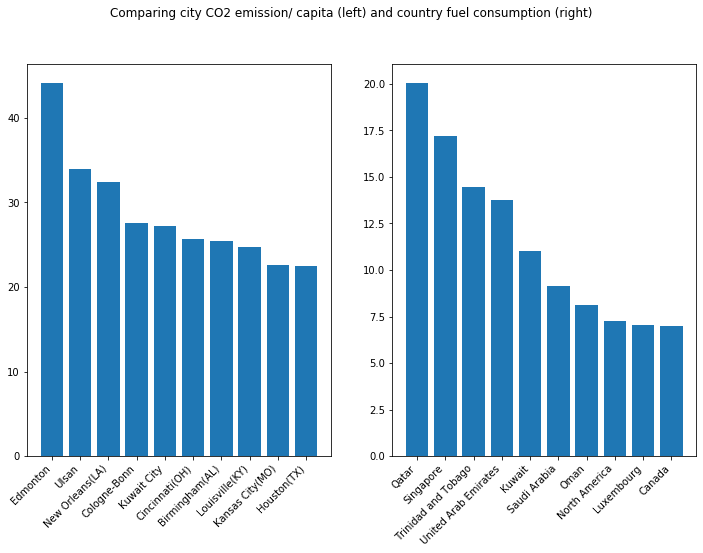

In [7]:
# plot both
# df = df.set_index('Country')
# df2 = df2.set_index('City')
x1 = df2['City']
y1 = df2['CO2 Emissions per Capita (metric tonnes)']
x2 = df['Country']
y2 = df['Fossil fuel per capita (10MWh)']
fig, axs = plt.subplots(1,2, figsize=(12,8))
fig.autofmt_xdate(rotation=45)
fig.suptitle('Comparing city CO2 emission/ capita (left) and country fuel consumption (right)')
axs[0].bar(x1, y1)
axs[1].bar(x2,y2)

The plot to the left are most polluting cities (CO2 emmission) per capita and on the right are the countries with the highest fossil fuel consuming countries per capita. There are a few of the highest polluting cities in the highest fuel consuming coutries which would indicate that there is a connection between the city and country. However if you look at the top four cities closly to see why they emmite so much CO2, you will find some interesting facts such as, Edmonton has some of the largest petrochemical and metal/ machinary industries in Canada. Ulsan is home to Korea's Hyundai motor manufacturing plant. New Orleans has some of the largest oil/ gas producers in the USA. Cologne-Bonn is one of euope's largest automotive industry. 

So when acessing the CO2 emission of a city, the largest parameter which impacts emission is probably the unique activites/ industries which are located in the city itself and not solely the country which the city is located in.

 #### Predicting city location

In this section we will attempt to find out if a cities coordinates impact various social parameters of a given city. We will also fit a model to some the social parameters and see if it is possible to predict with a certain accuracy the location of the city. We will start by finding the coordinates of all cities and then showing some parameter visualizations.

In [27]:
from geopy.geocoders import Nominatim
import seaborn as sns
from  matplotlib import pyplot
from matplotlib.pyplot import figure
from ast import literal_eval
import plotly.graph_objects as go

In [25]:
df = pd.read_excel('Cities.xls', index_col=0, skipinitialspace=True) # Read with excel index. 

# Function to get coordinates
def add_coordinates(city):
    """
    This functon will add long. / lat. coordinates as tuple for a city
    """

    if city != str:
        city = str(city)
    if city == "Baltimore(MD)":
        city = "Baltimore"
    if city == "Birmingham(AL)":
        city = "Birmingham"
    if city == "Valencia(VZL)":
        city = "Valencia"
    if city == "Tampa-St. Petersburg(FL)":
        city = "St. Petersburg, Florida"
    if city == "Denver-Aurora(CO)":
        city = "Aurora, Colorado"
    if city == "Minneapolis-St. Paul(MN)":
        city = "Saint Paul, MN"
    geolocator = Nominatim(user_agent="user_agent")
#     print(city)
    location = geolocator.geocode(city)
    lat_long = (location.latitude, location.longitude)
    return lat_long
    # print(location.address)
    
# df["coordinates"] = df["City"].apply(add_coordinates)   
# The function above takes a long time to run so we run it once 
# and save the full set with coordinates as a csv for fast loading later

df = pd.read_csv('location_from_pickle.csv') # Previous saved dataset  

Now that we have the coordinates for all cities. We will proceed to try with predicting location, to start with we will see if we can predict the distance a city is from the equator using some social and economic parameters. 

In [26]:
# Function to define distance in km from equater
def eq_dist(coord):
    # 1 degree is about 111.045 km
    dist = literal_eval(coord)[0]*111.045
    return int(abs(dist)) # Make distances south of equater positive.

df["eq_dist[km]"] = df["coordinates"].apply(eq_dist)
# Make sure everything looks ok.
df[['City', 'cityID', 'Country', 'coordinates', 'eq_dist[km]']].head()

,City,cityID,Country,coordinates,eq_dist[km]
0,Baltimore(MD),285.0,United States,"(39.2908816, -76.610759)",4363
1,Melbourne,10.0,Australia,"(-37.8142176, 144.9631608)",4199
2,Niamey,186.0,Niger,"(13.524834, 2.109823)",1501
3,Hanoi,328.0,Vietnam,"(21.0294498, 105.8544441)",2335
4,Urumqi,67.0,China,"(43.419754, 87.319461)",4821


Before making any models, lets visualize a much discussed parameter for each city, namely GDP/ capita. 

In [29]:
# apply lat/ long to lists to further plot 
lat_list = []
long_list = []
for i in df['coordinates']:
    lat_list.append(literal_eval(i)[0])
    long_list.append(literal_eval(i)[1])
# long_list
z = df['GDP per Capita (USD)']

# Make plot
import chart_studio.plotly as py
import plotly.graph_objects as go

scatter = go.Scatter(x=np.array(long_list).flatten(),
                     y=np.array(lat_list).flatten(),
                     marker={'color': np.array(z).flatten(),
                             'showscale': True},
                     mode='markers')
fig = go.FigureWidget(data=[scatter],
                      layout={'xaxis': {'title': 'longitude'},
                              'yaxis': {'title': 'latitude'}})
go.Figure(fig)

From the plot above showing the coordinates ploted with intensity being GDP per capita, it looks like northern cities have a higher GDP (along with Oceania regions). This is somewhat expected but lets investigate this further and see if the relationship between location and along with other parameters can be modeled. 

In [31]:
# Start by choosing relevant features and normalizing them. 
features = ['Population Density (per sq. km)', 'Urbanization Rate 2015 (%)', 'GDP per Capita (USD)', 'Life Expectancy (years)']
X = df[features]
# X.isnull().sum()
X = X.fillna(X.mean())
X_n = (X-X.mean())/X.std()
y = df['eq_dist[km]']
X_n.shape

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.33, random_state=123)
# define the keras model
model = Sequential()
model.add(Dense(500, input_dim=X_n.shape[1], activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=100, batch_size=100, validation_data=(X_test, y_test))

# evaluate the keras model
pred = model.predict(X_test)

# evaluate predictions
print("\nMAE=%f" % mean_absolute_error(y_test, pred))
print("\nRMSE=%f" % np.sqrt(mean_squared_error(y_test, pred)))
print("r^2=%f" % r2_score(y_test, pred))



Train on 222 samples, validate on 110 samples
Epoch 1/100
222/222 [==============================] - 1s 2ms/step - loss: 15175926.2252 - val_loss: 13604297.0000
Epoch 2/100
222/222 [==============================] - 0s 54us/step - loss: 15171811.3153 - val_loss: 13600352.0909
Epoch 3/100
222/222 [==============================] - 0s 58us/step - loss: 15167362.7297 - val_loss: 13595812.9091
Epoch 4/100
222/222 [==============================] - 0s 58us/step - loss: 15161859.0000 - val_loss: 13590251.0000
Epoch 5/100
222/222 [==============================] - 0s 58us/step - loss: 15155104.2883 - val_loss: 13583399.4545
Epoch 6/100
222/222 [==============================] - 0s 54us/step - loss: 15146393.3874 - val_loss: 13575048.9091
Epoch 7/100
222/222 [==============================] - 0s 49us/step - loss: 15137754.2523 - val_loss: 13564860.4545
Epoch 8/100
222/222 [==============================] - 0s 49us/step - loss: 15126097.0631 - val_loss: 13552543.4545
Epoch 9/100
222/222 [=====

Mean absolute error (MAE) for our model is  about 1140 km which is about 10.4 degrees when it is evaluated on the test set (1/3 of total dataset). That means that given the 4 features used ('Population Density (per sq. km)', 'Urbanization Rate 2015 (%)', 'GDP per Capita (USD)', 'Life Expectancy (years)') we are able to predict the distance the city is from the equater within an error of 10.4 degrees! This is quite a small distance, see the map figure below for reference, the horizontal lines are spaced 15 degrees apart. 

![alt text](map_lines.gif "World latitude and longitude map")

So now that we have seen that we can model the distance from the equator, lets take a step further and try to model the real coordinates of cities (latitude/ longitude). We will also try doing classification of the country regions, i.e. predict which continent the city is located. This time we will try to further analize the features which are used in the prediction model. 

In [44]:
# Again start by loading dataset with pre-calcualated city coordinates
df = pd.read_csv('location_from_pickle.csv')
df.describe()

,Unnamed: 0,cityID,clusterID,Car Modeshare (%),Public Transit Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),...,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor,AvgTemperature,Temperature,Humidity
count,332.000000,332.000000,332.000000,268.000000,269.000000,255.000000,332.000000,331.000000,332.000000,332.000000,...,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,111.000000,332.000000,332.000000
mean,165.500000,165.801205,5.578313,45.611819,28.133913,17.510196,1.056024,14.674622,39.041416,0.038099,...,0.398885,0.417877,0.382575,0.171293,0.491230,0.492131,0.412452,56.055856,8.618614,74.870482
std,95.984374,95.619666,3.591263,27.787198,20.310731,14.842958,0.425800,8.726269,77.236480,0.068863,...,0.078519,0.266415,0.153237,0.159287,0.189169,0.227305,0.151724,23.389997,11.769086,20.120290
min,0.000000,1.000000,1.000000,0.000000,0.400000,0.000000,0.010000,0.600000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-24.900000,12.000000
25%,82.750000,83.750000,2.000000,21.525000,11.000000,3.200000,0.707500,7.500000,0.000000,0.000000,...,0.358622,0.215262,0.281454,0.055493,0.364674,0.308533,0.320159,42.100000,-0.700000,65.000000
50%,165.500000,165.500000,6.000000,38.000000,28.000000,17.000000,1.055000,13.900000,0.000000,0.000000,...,0.390940,0.342730,0.341291,0.119005,0.533161,0.469138,0.394086,57.500000,7.915000,80.000000
75%,248.250000,248.250000,8.000000,68.775000,42.000000,26.200000,1.322500,20.400000,42.825000,0.053334,...,0.423659,0.707410,0.451648,0.248133,0.640700,0.679300,0.474605,74.200000,17.637500,88.000000
max,331.000000,331.000000,12.000000,94.800000,82.500000,78.000000,2.120000,37.200000,588.000000,0.612982,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,30.450000,100.000000


Above you can see the main statistical features for each column. The dataset consists of 332 cities as it is right now. Since I saved the coordinates in a formatted string in a single column in the dataframe, first I parse them into two different **float** columns, namely: 'Latitude' and 'Longitude'.

In [45]:
regions = pd.read_csv('country_region.csv')[['Country','Region']]
df = pd.merge(df, regions, on='Country', how='inner')

def get_lat(x):
    return float(x.split(',')[0][1:])
def get_lon(x):
    return float(x.split(',')[1][:-1])

df = df[~df['Location'].isnull()] # To make sure that there's no null values amongst that geopy returned.

df['Latitude'] = df['Location'].apply(get_lat)
df['Longitude'] = df['Location'].apply(get_lon)
df[['Region', 'Latitude', 'Longitude']].head(3)

,Region,Latitude,Longitude
0,North America,39.290882,-76.610759
1,North America,43.034993,-87.922497
2,North America,30.271129,-97.743700


In [46]:
from sklearn.preprocessing import LabelEncoder

def multi_label_encoder(df, cols2code):
        encoder = LabelEncoder()
        for col in cols2code:
            df[col+'(Encoded)'] = encoder.fit_transform(df[col])
        return df
    
df = multi_label_encoder(df, ['Region', 'Country'])
df.head()

,Unnamed: 0,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),...,AvgTemperature,coordinates,Temperature,Humidity,Location,Region,Latitude,Longitude,Region(Encoded),Country(Encoded)
0,0,Baltimore(MD),285.0,7.0,Auto Sprawl,United States,85.0,6.1,0.3,2.6,...,NaN,"(39.2908816, -76.610759)",7.34,82,"(39.2908816, -76.610759)",North America,39.290882,-76.610759,5,105
1,5,Milwaukee(WI),297.0,7.0,Auto Sprawl,United States,88.6,3.6,0.5,2.7,...,NaN,"(43.0349931, -87.922497)",-9.69,54,"(43.0349931, -87.922497)",North America,43.034993,-87.922497,5,105
2,13,Austin(TX),301.0,7.0,Auto Sprawl,United States,86.8,2.6,0.8,1.8,...,NaN,"(30.2711286, -97.7436995)",-1.02,34,"(30.2711286, -97.7436995)",North America,30.271129,-97.743700,5,105
3,18,Chicago(IL),269.0,8.0,Auto Innovative,United States,78.0,12.0,0.7,3.1,...,NaN,"(41.8755616, -87.6244212)",-8.07,63,"(41.8755616, -87.6244212)",North America,41.875562,-87.624421,5,105
4,40,Atlanta(GA),273.0,8.0,Auto Innovative,United States,86.8,3.1,0.3,1.3,...,NaN,"(33.6238152, -84.1693827)",2.43,74,"(33.6238152, -84.1693827)",North America,33.623815,-84.169383,5,105


Now, the dataset is ready to be investigated. First things first, we perform a percentage based check to see which columns are missing and how many values compared to the total number of rows in the dataset. If particular columns are missing relatively too large number of values, it's better to consider dropping the feature them instead of trying to impute the values. Below the top five features are shown, the missing values is shown in procent of total missing for the feature. If a feature is missing more than 25% of its values it is deemed not reliable and therfor dropped. 

In [47]:
temp_df = pd.DataFrame(df.isnull().sum(axis=0), columns=['Missing Values'])/df.count()[0]*100 
temp_df = temp_df.sort_values(by=temp_df.columns[0], ascending=False)
pd.set_option('display.max_rows', 1000)
print(temp_df.head(5))

# Drop features
cols2drop = temp_df[temp_df['Missing Values']>=25].index
df = df.drop(cols2drop, axis=1).drop('Unnamed: 0', axis=1).drop('coordinates', axis=1)
df.head(3)

                        Missing Values
AvgTemperature               67.441860
Traffic Index                55.149502
Inefficiency Index           55.149502
Travel Time Index            55.149502
Congestion PM Peak (%)       47.840532


,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),...,Sprawl Factor,Network Density Factor,Temperature,Humidity,Location,Region,Latitude,Longitude,Region(Encoded),Country(Encoded)
0,Baltimore(MD),285.0,7.0,Auto Sprawl,United States,85.0,6.1,2.6,0.66,8.5,...,0.722163,0.425187,7.34,82,"(39.2908816, -76.610759)",North America,39.290882,-76.610759,5,105
1,Milwaukee(WI),297.0,7.0,Auto Sprawl,United States,88.6,3.6,2.7,0.64,9.8,...,0.680911,0.582846,-9.69,54,"(43.0349931, -87.922497)",North America,43.034993,-87.922497,5,105
2,Austin(TX),301.0,7.0,Auto Sprawl,United States,86.8,2.6,1.8,0.60,12.8,...,0.765455,0.379809,-1.02,34,"(30.2711286, -97.7436995)",North America,30.271129,-97.743700,5,105


Now that all viable features are left in our dataframe we will perform feature selection and select the most useful features to be used in the model.

Instead of trying to impute values for the remaining columns we will check the correlation, first correlation check between the coordinates and the Latitude/Longitude values - as a smart way of feature selection. The absolute value of correlation is used because the important aspect is the magnitude of the correlation to explain a change in a variable compared to another one.

In [48]:
# Correlation with latitude
pd.set_option('display.max_rows', 1000)
corr_Lat = abs(pd.DataFrame(df.corr()['Latitude'])).sort_values(by='Latitude', ascending=False)
corr_Lat.head(10)

,Latitude
Latitude,1.000000
Temperature,0.669497
clusterID,0.496319
Road Deaths Rate (per 1000),0.494275
Life Expectancy (years),0.460763
GDP per Capita (USD),0.458740
Digital Penetration,0.458065
Development Factor,0.433200
Internet Penetration,0.404412
CO2 Emissions per Capita (metric tonnes),0.399059


In [49]:
# Correlation with longitude
pd.set_option('display.max_rows', 1000)
corr_Lon = abs(pd.DataFrame(df.corr()['Longitude'])).sort_values(by='Longitude', ascending=False)
corr_Lon.head(10)

,Longitude
Longitude,1.000000
Region(Encoded),0.686697
Car Modeshare (%),0.538104
Urbanization Rate Change 2015 – 2025 (pp),0.525583
Urbanization Rate 2015 (%),0.437028
Sustainability Factor,0.433833
Congestion Factor,0.430325
Population Factor,0.429835
Walking Modeshare (%),0.389066
Development Factor,0.380073


Interestingly, if you see the index of the outputs above, the features that the latitude and longitude values depend on the highest are completely different. Lattitude being correlated to the average temperature on 30th of November is quite logical. However, the other features do not represent a direct relation to both longitude and latitude.

Since there is no distinct features for both latitude and longitude, three of the features correlated to each will selected for the model. We will now attempt to perform continent classification of the cities. 

In [50]:
df_reg = df[['Road Deaths Rate (per 1000)','Urbanization Rate Change 2015 – 2025 (pp)', 'Congestion Factor',\
         'Digital Penetration', 'Car Modeshare (%)', 'Life Expectancy (years)', \
         'Region(Encoded)']].dropna()
X = df_reg[['Road Deaths Rate (per 1000)','Urbanization Rate Change 2015 – 2025 (pp)', 'Congestion Factor',\
         'Digital Penetration', 'Car Modeshare (%)', 'Life Expectancy (years)']].values
y = df_reg['Region(Encoded)'].values
X_norm = (X - np.mean(X))/np.std(X) # Normalize values so we get better results!
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=42)

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 600, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap} 

rf = RandomForestClassifier()
clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   36.4s finished


0.8688524590163934

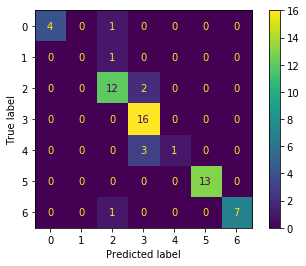

In [52]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

Three fold cross validation has been used to evaluate the continent classification, as seen above the classification model was able to classify the cities continent quite well, acheiving about 87% accuracy when evaluated.

Now we will move on to the most challenging part, namely predicting the latidtude/ longitude coordinates of cities. To do this a multilayer feed-forward neural network will be used. 

By seeing the correlation results above, we decided to use 6 features in total:
* 3 features that are correlated to Latitude the most (which are not directly related with geography).
* 3 features that are correlated to Longitude the most (which are not directly related with geography).

The chosen features are: Road Deaths Rate (per 1000), Digital Penetration, Life Expectancy (years), Car Modeshare (%), Urbanization Rate Change 2015 – 2025 (pp), Congestion Factor. 

In [53]:
df_nn = df[['Road Deaths Rate (per 1000)','Urbanization Rate Change 2015 – 2025 (pp)', 'Congestion Factor',\
         'GDP per Capita (USD)', 'Car Modeshare (%)', 'Life Expectancy (years)', \
         'Latitude', 'Longitude']].dropna()

X = df_nn[['Road Deaths Rate (per 1000)','Urbanization Rate Change 2015 – 2025 (pp)', 'Congestion Factor',\
         'GDP per Capita (USD)', 'Car Modeshare (%)', 'Life Expectancy (years)']].values

y = df_nn[['Latitude', 'Longitude']].values

X_norm = (X - np.mean(X))/np.std(X) # Normalize values so we get better results!

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=np.shape(X_train)[1], activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(2, activation='linear')) # Output layer.


# compile the keras model
opt = Adam(learning_rate=1e-2)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
model.fit(X_train, y_train, epochs=150, batch_size=64, verbose=1, validation_split=0.25) # Do not print the progress since 3500 epochs.

Train on 127 samples, validate on 43 samples
Epoch 1/150
127/127 [==============================] - 0s 1ms/step - loss: 3754.4558 - mean_squared_error: 3754.4558 - val_loss: 2849.2747 - val_mean_squared_error: 2849.2747
Epoch 2/150
127/127 [==============================] - 0s 55us/step - loss: 3553.8931 - mean_squared_error: 3553.8933 - val_loss: 2741.9998 - val_mean_squared_error: 2741.9998
Epoch 3/150
127/127 [==============================] - 0s 39us/step - loss: 3408.4996 - mean_squared_error: 3408.4995 - val_loss: 2668.1365 - val_mean_squared_error: 2668.1365
Epoch 4/150
127/127 [==============================] - 0s 47us/step - loss: 3298.5138 - mean_squared_error: 3298.5137 - val_loss: 2604.8672 - val_mean_squared_error: 2604.8672
Epoch 5/150
127/127 [==============================] - 0s 47us/step - loss: 3183.7068 - mean_squared_error: 3183.7068 - val_loss: 2542.9495 - val_mean_squared_error: 2542.9495
Epoch 6/150
127/127 [==============================] - 0s 55us/step - loss: 

127/127 [==============================] - 0s 39us/step - loss: 2156.8914 - mean_squared_error: 2156.8914 - val_loss: 2467.0046 - val_mean_squared_error: 2467.0046
Epoch 94/150
127/127 [==============================] - 0s 55us/step - loss: 2157.8331 - mean_squared_error: 2157.8333 - val_loss: 2463.9001 - val_mean_squared_error: 2463.9001
Epoch 95/150
127/127 [==============================] - 0s 39us/step - loss: 2155.7198 - mean_squared_error: 2155.7197 - val_loss: 2467.0696 - val_mean_squared_error: 2467.0696
Epoch 96/150
127/127 [==============================] - 0s 39us/step - loss: 2154.0555 - mean_squared_error: 2154.0557 - val_loss: 2472.3252 - val_mean_squared_error: 2472.3252
Epoch 97/150
127/127 [==============================] - 0s 39us/step - loss: 2153.9674 - mean_squared_error: 2153.9675 - val_loss: 2483.2473 - val_mean_squared_error: 2483.2473
Epoch 98/150
127/127 [==============================] - 0s 39us/step - loss: 2154.8869 - mean_squared_error: 2154.8867 - val_los

In [55]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

41.04008580929114

The error above is the mean euclidean distance between the predicted coordinates and the true coordinates. Since we are dealing with a 2-D plane, it coul be nice if we could visualize this, lets do that below.

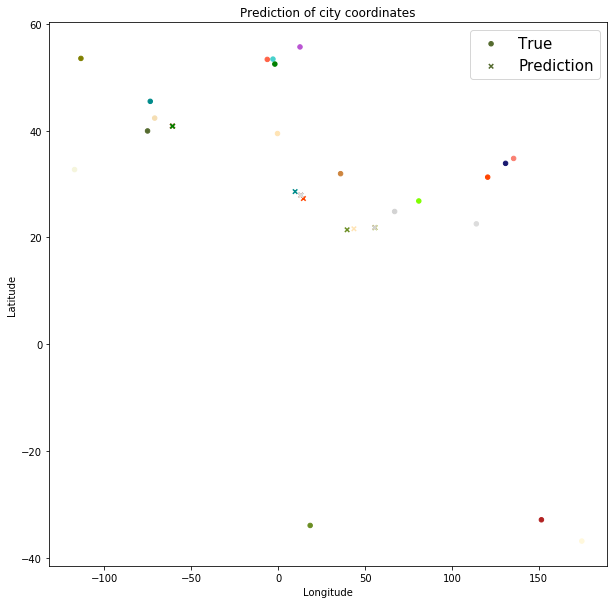

In [57]:
import matplotlib.colors as mcolors
import random

pred = pd.DataFrame(y_pred, columns=['Latitude', 'Longitude'])
true = pd.DataFrame(y_test, columns=['Latitude', 'Longitude'])

# Too much info when all preditcitons are plotted, just plot k of them
k = 20
pred_k = pred[:k]
true_k = true[:k]

color_dict = mcolors.CSS4_COLORS
color_list = list(color_dict.keys())
colors = random.sample(color_list, k=k) # pick the k nr. colors needed at random

# plot
fig, ax = plt.subplots(figsize=(10,10))
true_k.plot.scatter(x='Longitude', y='Latitude', marker='o', color=colors, ax=ax, label='True')
pred_k.plot.scatter(x='Longitude', y='Latitude', marker='x', color=colors, ax=ax, label='Prediction')
plt.title('Prediction of city coordinates')
ax.legend(prop={'size': 15})

The plot above gives good intuition of how our model behaves. The model is able to predict the coordinats very well for most cities that have a latitude greater than about 20 (above the equator). However for cities which lie below the equator or outlier cities, the model has difficulties predicting the coordinates. 